#############################################
# Prerequisites - Load Libraries

In [1]:
source('MS0_Libraries.r')

In [14]:
source('MS4_Plot_Config.r')

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


###############################################
# Preqrequisites Configurations & Parameters

In [15]:
data_path =  '../data/current'

In [16]:
result_path =  '../results/current'

In [18]:
libraries = c('L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10','L11', 'L12', 'L13', 'L14')

In [19]:
### Data Frame for saving rand index

In [20]:

rand_index_results= data.frame()

########################################
# Prerequisites Data Loading

## Data from obs matrices

In [21]:
data_for_analysis_list = list()

In [22]:
variants = c('V1_Singlet')

In [23]:
for (i in variants){
    data_name = paste ( data_path, '/analysis/B/B3_Obs_Singlet_processed_rna.csv', sep = '')
    print(data_name)
    print(tail(file.info(data_name)$ctime))
    data_for_analysis_list[[i]] = read.csv ( data_name)
    }

[1] "/groups/umcg-franke-scrna/tmp01/users/umcg-closert/stemi/data/results//analysis/B/B3_Obs_Singlet_processed_rna.csv"
[1] "2023-07-06 14:08:20 UTC"


In [24]:
#data_for_analysis

In [25]:
head(data_for_analysis_list[[1]])

,X,nCount_HTO,nFeature_HTO,nCount_RNA,nFeature_RNA,percent_mt,HTO_maxID,HTO_secondID,HTO_margin,HTO_classification,⋯,measurement_y,delta_ef_value_group,delta_ef_value,sample_y,cell_type_concat..,cluster_cell_type_concat..,B2_Scanorama_Singlet_cluster,B2_Scanorama_Singlet_rb_mt_cluster,cell_type_Scanorama,cluster_cell_type_Scanorama
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,AAACCCACATACAGGG-1-L1,1574,7,3947,1232,7.980745,9.1,1.1,2.2530478,9.1,⋯,TP1,x_greater_1,14.30,9.1,B-cell,6_B-cell,8,8,B-cell,8_B-cell
2,AAACCCACATGACTTG-1-L1,379,7,5871,1890,7.256004,9.1,7.1,0.9431934,9.1,⋯,TP1,x_greater_1,14.30,9.1,Monocytes - CD16_FCGR3A,7_Monocytes - CD16_FCGR3A,9,9,Monocytes - CD16_FCGR3A,9_Monocytes - CD16_FCGR3A
3,AAACCCAGTCATCAGT-1-L1,421,7,3889,1297,4.551299,7.1,1.1,2.2652894,7.1,⋯,TP1,x_smaller_1,0.75,7.1,T-cell-CD4,0_T-cell-CD4,5,5,T-cell-CD4,5_T-cell-CD4
4,AAACCCAGTGGTAATA-1-L1,478,7,5094,1327,6.340793,9.1,8.1,1.3197352,9.1,⋯,TP1,x_greater_1,14.30,9.1,T-cell-CD4,1_T-cell-CD4,0,0,T-cell-CD4,0_T-cell-CD4
5,AAACCCATCATCACAG-1-L1,851,7,17480,2363,2.665904,9.1,5.1,1.6295940,9.1,⋯,TP1,x_greater_1,14.30,9.1,Plasma Blast,17_Plasma Blast,16,16,Plasma Blast,16_Plasma Blast
6,AAACCCATCGATGGAG-1-L1,473,7,4839,1511,5.435007,8.1,5.1,1.9195456,8.1,⋯,,,NA,NA,T-cell-CD4,1_T-cell-CD4,0,0,T-cell-CD4,0_T-cell-CD4


In [26]:
colnames(data_for_analysis_list[[1]])

[1] "X"                                                   
 [2] "nCount_HTO"                                          
 [3] "nFeature_HTO"                                        
 [4] "nCount_RNA"                                          
 [5] "nFeature_RNA"                                        
 [6] "percent_mt"                                          
 [7] "HTO_maxID"                                           
 [8] "HTO_secondID"                                        
 [9] "HTO_margin"                                          
[10] "HTO_classification"                                  
[11] "HTO_classification.global"                           
[12] "hash.ID"                                             
[13] "HTO_classification_final"                            
[14] "name"                                                
[15] "library"                                             
[16] "id"                                                  
[17] "read"                                                
[18] "pattern"                                             
[19] "sequence"                                            
[20] "feature_type"                                        
[21] "Unnamed..7"                                          
[22] "in_sample"                                           
[23] "display_name"                                        
[24] "group_x"                                             
[25] "HTO_Doublet_Classification"                          
[26] "doublet_score"                                       
[27] "predicted_doublet"                                   
[28] "A5_scrublet_predicted_doublet_lib0.1"                
[29] "A5_scrublet_doublet_score_lib_0.1"                   
[30] "A5_scrublet_predicted_doublet_lib0.2"                
[31] "A5_scrublet_doublet_score_lib_0.2"                   
[32] "A5_scrublet_predicted_doublet_lib"                   
[33] "A5_scrublet_doublet_score_lib"                       
[34] "n_genes"                                             
[35] "n_genes_by_counts"                                   
[36] "total_counts"                                        
[37] "total_counts_mt"                                     
[38] "pct_counts_mt"                                       
[39] "valid_cell_filter_dying"                             
[40] "valid_cell_filter_doublet"                           
[41] "A7_PCA_50_10_neighbors_cluster"                      
[42] "A7_PCA_100_10_neighbors_cluster"                     
[43] "A7_PCA_100_50_neighbors_cluster"                     
[44] "A7_PCA_500_50_neighbors_cluster"                     
[45] "A7_Singlet_PCA_50_10_neighbors_cluster"              
[46] "A7_Singlet_PCA_100_10_neighbors_cluster"             
[47] "A7_Singlet_RB_MT_PCA_50_10_neighbors_cluster"        
[48] "A7_Singlet_RB_MT_PCA_100_10_neighbors_cluster"       
[49] "library_id"                                          
[50] "B2_Concat_Singlet_PCA_50_10_neighbors_cluster"       
[51] "B2_Concat_Singlet_PCA_100_10_neighbors_cluster"      
[52] "B2_Concat_Singlet_RB_MT_PCA_50_10_neighbors_cluster" 
[53] "B2_Concat_Singlet_RB_MT_PCA_100_10_neighbors_cluster"
[54] "leiden"                                              
[55] "cell_type"                                           
[56] "cluster_cell_type"                                   
[57] "library.hashtag_x"                                   
[58] "age"                                                 
[59] "sex"                                                 
[60] "m_x"                                                 
[61] "classification"                                      
[62] "group_y"                                             
[63] "measurement_x"                                       
[64] "sample_x"                                            
[65] "Unnamed..0"                                          
[66] "library.hashtag_y"                                   
[67] "m_y"                               

In [27]:
#data_for_analysis_list[[1]]$display_name

In [28]:
nrow(data_for_analysis_list[[1]])  # 148275 --> only singlet variant

[1] 148275

## Parameters

In [29]:
variant = 'V1_Singlet'

In [30]:
used_clustering = 'B2_Scanorama_Singlet_rb_mt_cluster'
# used_clustering =  'B2_Scanorama_Singlet_rb_mt_cluster'

In [31]:
used_annotation = 'cell_type_Scanorama'

In [32]:
data_for_analysis = data_for_analysis_list[[variant]]

In [33]:
data_for_analysis$cell_type = data_for_analysis[,used_annotation]

In [34]:
unique(data_for_analysis[,used_annotation])

[1] "B-cell"                  "Monocytes - CD16_FCGR3A"
 [3] "T-cell-CD4"              "Plasma Blast"           
 [5] "T-cell-CD8"              "Monocytes - CD14"       
 [7] "Other"                   "NK"                     
 [9] "Dendritic"               "Progenitor"             
[11] "Megakaryocytes"

In [35]:
unique(data_for_analysis[,used_clustering])

[1]  8  9  5  0 16  1  6  2  4 14 11  3  7 13 10 17 12 15 18

## Join Meta-Data for cell-type assignemts

In [36]:
path =  paste ( data_path, "/preprocessed-data/meta-data/Annotations_Mapping.csv", sep = '')
meta_cell_types = read.csv( path )
print(file.info(path)$mtime)
meta_cell_types$cell_type = meta_cell_types$Cat3

[1] "2023-07-06 14:12:39 UTC"


In [37]:
unique(meta_cell_types$cell_type)

[1] "T-cell-CD4"         "T-cell-CD8"         "NK"                
[4] "B-cell"             "T-cell"             "Monocytes - CD14"  
[7] "Monocytes - FCGR3A" "Dendritic"          "Other"

In [38]:
data_for_analysis = merge(data_for_analysis, meta_cell_types, all.x = TRUE)

In [39]:
#data_for_analysis[is.na(data_for_analysis$Cat1),]$cell_type

In [40]:
#head(data_for_analysis_list[[i]])

In [41]:
nrow(data_for_analysis) # one row per cell; only Singlets

[1] 148275

## FACS frequencies

In [52]:
path =  paste ( data_path, "/preprocessed-data/meta-data/FACS_percentages_clean.csv", sep = '')
facs_data = read.csv( path )
print(file.info(path)$mtime)

[1] "2023-08-01 08:01:47 UTC"


In [53]:
head(facs_data,2)

,sample,TP,type,percentage,perc_cor
,<chr>,<chr>,<chr>,<chr>,<chr>
1,K2,TP0,pDCs,"0,27 %",0.27
2,K4,TP0,pDCs,"0,79 %",0.79


In [54]:
facs_data$perc_cor = as.numeric(facs_data$perc_cor)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [55]:
facs_data$sample = str_replace(facs_data$sample, ' ', '')
facs_data$TP = str_replace(facs_data$TP, ' ', '')

In [56]:
facs_data$sample_id = paste0(str_replace(facs_data$sample, ' ', ''), '_', str_replace(facs_data$TP, ' ', ''))

In [57]:
unique(facs_data$type)

[1] "pDCs"          "mDCs"          "HLADR+"        "CD56+d"       
 [5] "CD56+b"        "CD56+"         "nonclassicalM" "intermediateM"
 [9] "classicalM"    "CD14+"         "CD19+"         "CD8+_CD4+"    
[13] "CD8-_CD4-"     "CD8+"          "CD4+"          "CD3+"

In [58]:
facs_data[(is.na(str_extract(facs_data$percentage, '%'))) & (is.na(str_extract(facs_data$percentage, '/'))) & (facs_data$percentage != ''),]

,sample,TP,type,percentage,perc_cor,sample_id
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
430,M1,TP1,HLADR+,0.0075,0.75,M1_TP1
1448,M1,TP1,CD14+,0.0751,7.51,M1_TP1
1882,M1,TP1,CD8-_CD4-,0.0288,2.80,M1_TP1
2237,M8,TP4,CD3+,0.552,55.20,M8_TP4
2265,M8,TP3,CD3+,0.536,53.60,M8_TP3
2293,M8,TP2,CD3+,0.55,55.00,M8_TP2
2321,M8,TP1,CD3+,0.537,53.70,M8_TP1


In [59]:
## subdivide according to different FACS granularities
facs_gran1 = c('CD3+', 'CD19+', 'CD14+', 'CD56+', 'HLADR+')
facs_gran2 = c('CD4+', 'CD8+', 'CD8+_CD4+', 'CD8-_CD4-', 'CD19+', 'classicalM', 'nonclassicalM', 'intermediateM', 'CD56+d','CD56+b',  'mDCs' , 'pDCs')

In [60]:
facs_data_gran1 = facs_data[facs_data$type %in% facs_gran1,]
facs_data_gran2 = facs_data[facs_data$type %in% facs_gran2,]

In [61]:
## summarise and investigate percentages per person

In [62]:
facs_data_gran1_sum = facs_data_gran1 %>% group_by(sample, TP, sample_id) %>% summarise(sum_perc = sum(perc_cor))
facs_data_gran2_sum = facs_data_gran2 %>% group_by(sample, TP, sample_id) %>% summarise(sum_perc_gran2 = sum(perc_cor))

`summarise()` has grouped output by 'sample', 'TP'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'sample', 'TP'. You can override using the `.groups` argument.


In [63]:
head(facs_data_gran2_sum,2)

sample,TP,sample_id,sum_perc_gran2
<chr>,<chr>,<chr>,<dbl>
K1,TP0,K1_TP0,NA
K10,TP0,K10_TP0,96.7


In [64]:
unique(facs_data_gran2_sum$sample_id)[!unique(facs_data_gran2_sum$sample_id) %in% unique(facs_data_gran1_sum$sample_id)]

character(0)

In [65]:
nrow(facs_data_gran1_sum)
nrow(facs_data_gran2_sum)

[1] 146

[1] 146

In [66]:
#facs_data[facs_data$sample == 'M26',]

In [67]:
facs_data_sum = merge(facs_data_gran1_sum, facs_data_gran2_sum, all.x = TRUE)

In [68]:
head(facs_data_sum,2)

,sample,TP,sample_id,sum_perc,sum_perc_gran2
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,K1,TP0,K1_TP0,NA,NA
2,K10,TP0,K10_TP0,96.91,96.7


In [69]:
#facs_data_sum[is.na(facs_data_sum$sum_perc_gran2),]   # samples for which no data was measured
remove_samples = facs_data_sum$sample_id[is.na(facs_data_sum$sum_perc_gran2)]

In [70]:
## remove:
facs_data_sum = facs_data_sum[! (facs_data_sum$sample_id %in% remove_samples),]
facs_data_gran1 = facs_data_gran1[! (facs_data_gran1$sample_id %in% remove_samples),]
facs_data_gran2 = facs_data_gran2[! (facs_data_gran2$sample_id %in% remove_samples),]

In [71]:
### check out facs_data_sum
head(facs_data_sum,2)

,sample,TP,sample_id,sum_perc,sum_perc_gran2
,<chr>,<chr>,<chr>,<dbl>,<dbl>
2,K10,TP0,K10_TP0,96.91,96.700
3,K11,TP0,K11_TP0,95.00,94.877


In [72]:
length(unique(facs_data_sum$sample_id))

[1] 122

In [73]:
## check and visualized diff
facs_data_sum_plot1 = facs_data_sum
facs_data_sum_plot1$diff = facs_data_sum_plot1$sum_perc - facs_data_sum_plot1$sum_perc_gran2

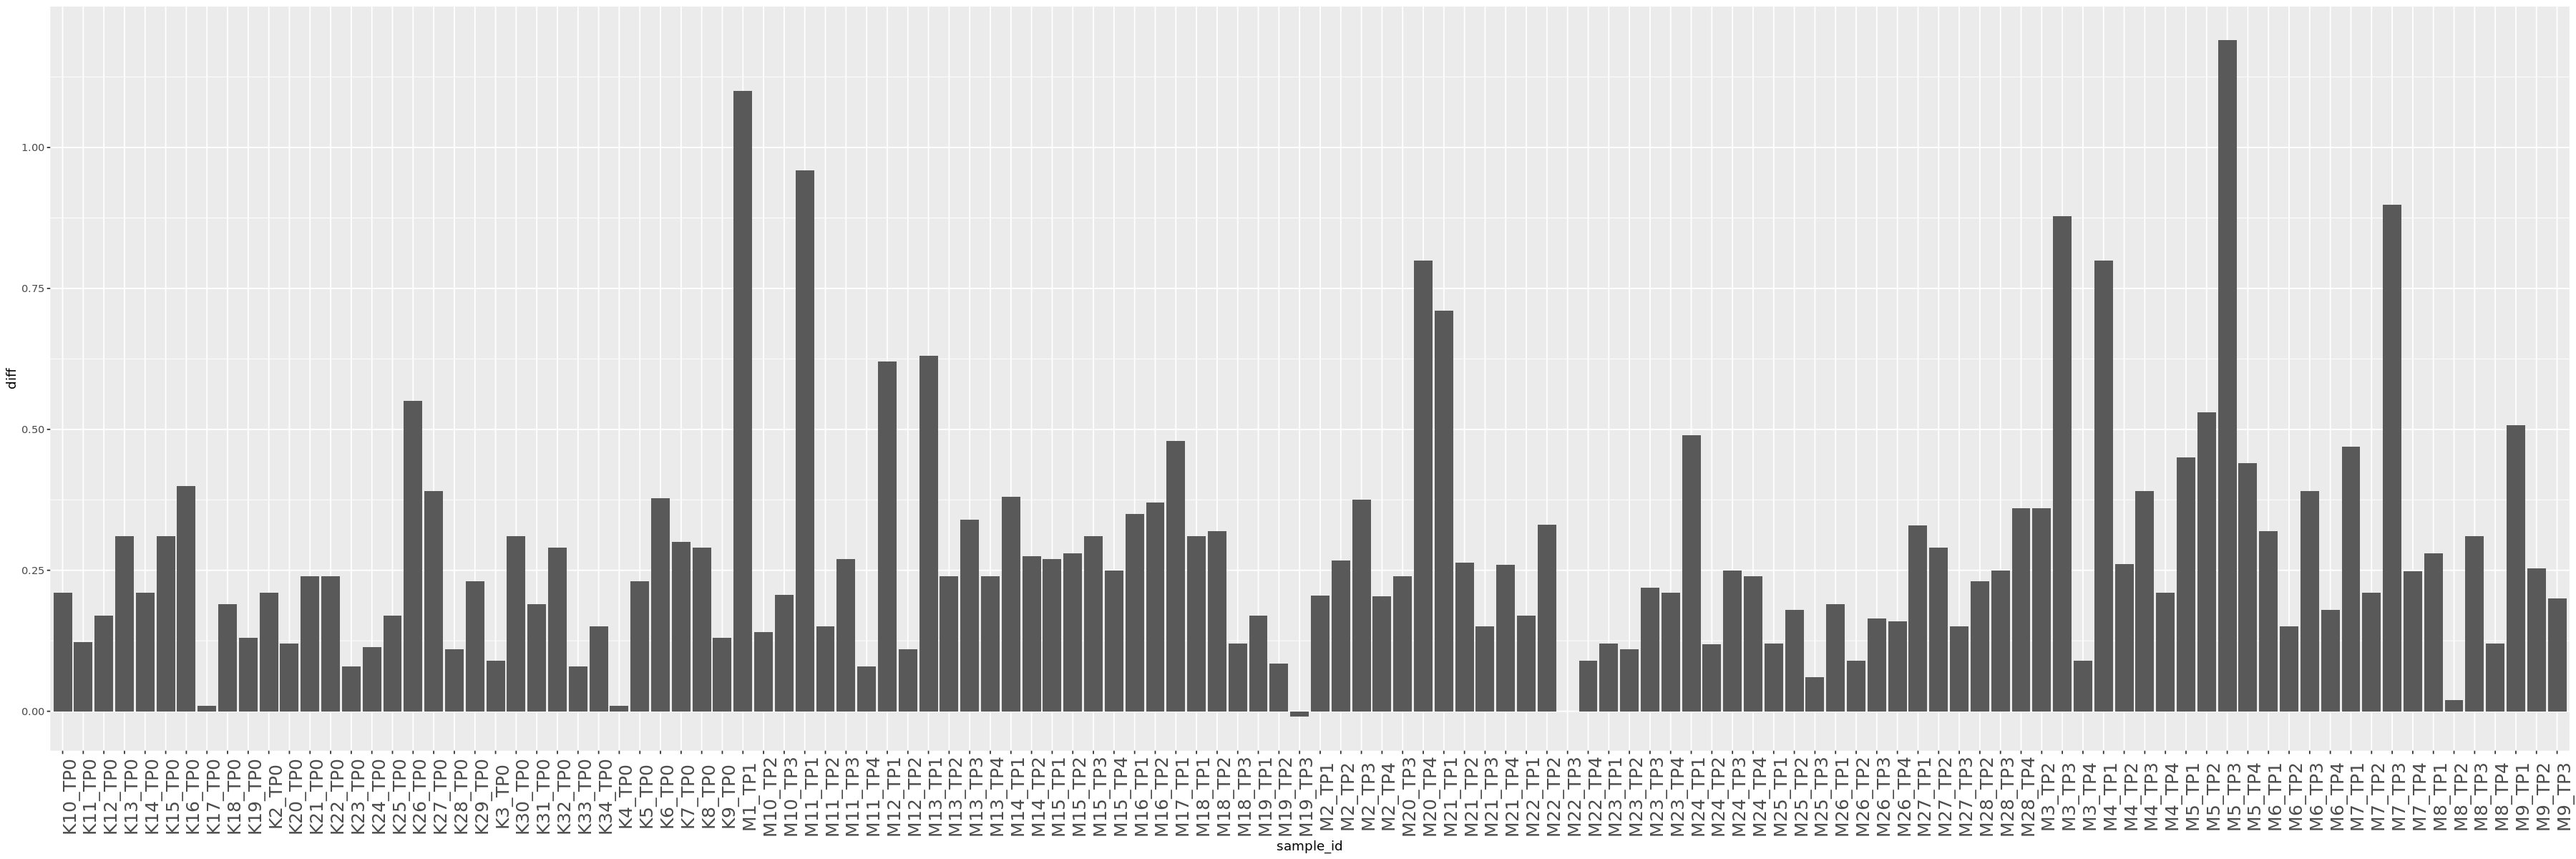

In [74]:
options(repr.plot.width=30, repr.plot.height=10)
ggplot(facs_data_sum_plot1, aes( y=diff, x= sample_id)) + 
    geom_bar(position="dodge", stat="identity") + theme(axis.text.x = element_text(angle = 90, size = 15))

In [75]:
head(facs_data_sum_plot1,4)

,sample,TP,sample_id,sum_perc,sum_perc_gran2,diff
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2,K10,TP0,K10_TP0,96.91,96.700,0.210
3,K11,TP0,K11_TP0,95.00,94.877,0.123
4,K12,TP0,K12_TP0,87.70,87.530,0.170
5,K13,TP0,K13_TP0,95.09,94.780,0.310


In [76]:
### Prepare mapping NA cell amount

In [77]:
facs_data_sum$NA_cat_gran1 = 100 - facs_data_sum$sum_perc
facs_data_sum$NA_cat_gran2 = 100 - facs_data_sum$sum_perc_gran2

In [78]:
head(facs_data_sum,2)

,sample,TP,sample_id,sum_perc,sum_perc_gran2,NA_cat_gran1,NA_cat_gran2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2,K10,TP0,K10_TP0,96.91,96.700,3.09,3.300
3,K11,TP0,K11_TP0,95.00,94.877,5.00,5.123


In [79]:
facs_data_sum_add1 =  facs_data_sum[,c('sample', 'TP', 'sample_id', 'NA_cat_gran1')]
colnames(facs_data_sum_add1) = c('sample', 'TP', 'sample_id', 'percentage')
facs_data_sum_add1$perc_cor = facs_data_sum_add1$percentage
facs_data_sum_add1$type = 'NA_assigned'

facs_data_sum_add2 =  facs_data_sum[,c('sample', 'TP', 'sample_id', 'NA_cat_gran2')]
colnames(facs_data_sum_add2) = c('sample', 'TP', 'sample_id', 'percentage')
facs_data_sum_add2$perc_cor = facs_data_sum_add2$percentage
facs_data_sum_add2$type = 'NA_assigned'

In [80]:
head(facs_data_sum_add1,2)

,sample,TP,sample_id,percentage,perc_cor,type
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2,K10,TP0,K10_TP0,3.09,3.09,NA_assigned
3,K11,TP0,K11_TP0,5.00,5.00,NA_assigned


In [81]:
head(facs_data_gran1,2)
facs_data_gran1 = rbind(facs_data_gran1, facs_data_sum_add1)
facs_data_gran2 = rbind( facs_data_gran2, facs_data_sum_add2)

,sample,TP,type,percentage,perc_cor,sample_id
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
293,K2,TP0,HLADR+,"0,97 %",0.97,K2_TP0
294,K4,TP0,HLADR+,"3,38 %",3.38,K4_TP0


In [82]:
### check
#facs_data_gran1 %>% group_by(sample_id) %>% summarise(sum_perc = sum(perc_cor))
#facs_data_gran2 %>% group_by(sample_id) %>% summarise(sum_perc = sum(perc_cor))

# Data Adaptions

In [83]:
### Generate new columns

In [84]:
for (i in variants){
    data_for_analysis_list[[i]]$classification_measurement = paste(data_for_analysis_list[[i]]$classification, '_',  data_for_analysis_list[[i]]$measurement_y, sep = '')
    }

# Analyze Samples

In [85]:
head(data_for_analysis,2)

,cell_type,X,nCount_HTO,nFeature_HTO,nCount_RNA,nFeature_RNA,percent_mt,HTO_maxID,HTO_secondID,HTO_margin,⋯,sample_y,cell_type_concat..,cluster_cell_type_concat..,B2_Scanorama_Singlet_cluster,B2_Scanorama_Singlet_rb_mt_cluster,cell_type_Scanorama,cluster_cell_type_Scanorama,Cat1,Cat2,Cat3
,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,B-cell,TGTACAGCAACGATTC-1-L2,1509,8,3183,988,4.241282,16.1,17.1,1.961109,⋯,16.1,B-cell,6_B-cell,8,8,B-cell,8_B-cell,Lymphocytes,B-Cell,B-cell
2,B-cell,TATACCTGTTCGTACA-1-L7,787,9,3967,1513,5.747416,2.3,5.3,2.348906,⋯,2.3,B-cell,6_B-cell,8,8,B-cell,8_B-cell,Lymphocytes,B-Cell,B-cell


In [86]:
colnames(data_for_analysis)

[1] "cell_type"                                           
 [2] "X"                                                   
 [3] "nCount_HTO"                                          
 [4] "nFeature_HTO"                                        
 [5] "nCount_RNA"                                          
 [6] "nFeature_RNA"                                        
 [7] "percent_mt"                                          
 [8] "HTO_maxID"                                           
 [9] "HTO_secondID"                                        
[10] "HTO_margin"                                          
[11] "HTO_classification"                                  
[12] "HTO_classification.global"                           
[13] "hash.ID"                                             
[14] "HTO_classification_final"                            
[15] "name"                                                
[16] "library"                                             
[17] "id"                                                  
[18] "read"                                                
[19] "pattern"                                             
[20] "sequence"                                            
[21] "feature_type"                                        
[22] "Unnamed..7"                                          
[23] "in_sample"                                           
[24] "display_name"                                        
[25] "group_x"                                             
[26] "HTO_Doublet_Classification"                          
[27] "doublet_score"                                       
[28] "predicted_doublet"                                   
[29] "A5_scrublet_predicted_doublet_lib0.1"                
[30] "A5_scrublet_doublet_score_lib_0.1"                   
[31] "A5_scrublet_predicted_doublet_lib0.2"                
[32] "A5_scrublet_doublet_score_lib_0.2"                   
[33] "A5_scrublet_predicted_doublet_lib"                   
[34] "A5_scrublet_doublet_score_lib"                       
[35] "n_genes"                                             
[36] "n_genes_by_counts"                                   
[37] "total_counts"                                        
[38] "total_counts_mt"                                     
[39] "pct_counts_mt"                                       
[40] "valid_cell_filter_dying"                             
[41] "valid_cell_filter_doublet"                           
[42] "A7_PCA_50_10_neighbors_cluster"                      
[43] "A7_PCA_100_10_neighbors_cluster"                     
[44] "A7_PCA_100_50_neighbors_cluster"                     
[45] "A7_PCA_500_50_neighbors_cluster"                     
[46] "A7_Singlet_PCA_50_10_neighbors_cluster"              
[47] "A7_Singlet_PCA_100_10_neighbors_cluster"             
[48] "A7_Singlet_RB_MT_PCA_50_10_neighbors_cluster"        
[49] "A7_Singlet_RB_MT_PCA_100_10_neighbors_cluster"       
[50] "library_id"                                          
[51] "B2_Concat_Singlet_PCA_50_10_neighbors_cluster"       
[52] "B2_Concat_Singlet_PCA_100_10_neighbors_cluster"      
[53] "B2_Concat_Singlet_RB_MT_PCA_50_10_neighbors_cluster" 
[54] "B2_Concat_Singlet_RB_MT_PCA_100_10_neighbors_cluster"
[55] "leiden"                                              
[56] "cluster_cell_type"                                   
[57] "library.hashtag_x"                                   
[58] "age"                                                 
[59] "sex"                                                 
[60] "m_x"                                                 
[61] "classification"                                      
[62] "group_y"                                             
[63] "measurement_x"                                       
[64] "sample_x"                                            
[65] "Unnamed..0"                                          
[66] "library.hashtag_y"                                   
[67] "m_y"                               

In [87]:
nrow(data_for_analysis)

[1] 148275

In [88]:
length(unique(data_for_analysis$m_x))   # 61 Samples 

[1] 61

In [89]:
unique(data_for_analysis[,c('m_x', 'group_y')]) %>% group_by(group_y) %>% count()

group_y,n
<chr>,<int>
acs,28
ccs,16
no_ccs,17


# Analyze cell type and cluster distributions

## Functions for analysis

In [97]:
### Calculate distribution

In [98]:
calculate_distribution = function(totalgroup, grouping, data_for_analysis){
    
    grouped =  data_for_analysis %>% group_by(.dots = c(grouping, totalgroup)) %>% count()
    
    total = data_for_analysis %>% group_by(.dots =grouping) %>% count()
    
    total$total_amount = total$n
    total = subset(total, select= -c(n))

    grouped$grouped_amount = grouped$n
    grouped = subset(grouped, select = -c(n))

    distribution = merge(total, grouped)

    distribution$percentage = round(distribution$grouped_amount / distribution$total_amount,2)
    
    return(distribution)
    }

In [99]:
### Function for visualization of distribution

In [100]:
calculate_and_plot_distribution = function(totalgroup, grouping, data_for_analysis, plot_width= 40, plot_height = 8, percentage = TRUE, text_size = 3, axis_text = 15, save = FALSE, save_name = 'None'){
    
    if( save == TRUE){
        pdf( paste('figures/B4/', save_name, '.pdf', sep = '') , width=plot_width, height=plot_height)
    }
    
    grouped =  data_for_analysis %>% group_by(.dots = c(grouping, totalgroup)) %>% count()
    total = data_for_analysis %>% group_by(.dots =grouping) %>% count()
    
    total$total_amount = total$n
    
    grouped$grouped_amount = grouped$n
    grouped = grouped[,-3]
    
    distribution = merge(total, grouped)
    
    distribution$percentage = round(distribution$grouped_amount / distribution$total_amount,2)
    
    all = data_for_analysis %>% group_by(.dots =totalgroup) %>% count()
    all$percentage = round( all$n / nrow(data_for_analysis),2)
    all$total_amount = nrow(data_for_analysis)
    all[grouping] = 'all'
    all['grouped_amount'] = all$n
    all = as.data.frame(all)
    
    options(repr.plot.width=plot_width, repr.plot.height=plot_height)
    
    if(percentage == TRUE){
        distribution = rbind(all, distribution)
        p = ggplot(distribution, aes(fill=as.character(distribution[,totalgroup]), y=percentage, x=as.character(distribution[,grouping]), label = percentage)) + geom_bar(position="stack", stat="identity")   + geom_text( size = text_size, position = position_stack(vjust = 0.5))  + ylab ('Percentage of cells')+ xlab(grouping) +  labs(fill = totalgroup) +  scale_fill_hue(c=45, l=80) +  theme( axis.title=element_text(size=axis_text), axis.text =element_text(size=axis_text) )
    }
    else{
        p = ggplot(distribution, aes(fill=as.character(distribution[,totalgroup]), y=grouped_amount, x=as.character(distribution[,grouping]), label = grouped_amount)) + geom_bar(position="stack", stat="identity")   + geom_text( size = text_size, position = position_stack(vjust = 0.5))  + ylab ('Amount of cells')+ xlab(grouping) +  labs(fill = totalgroup) +  scale_fill_hue(c=45, l=80)+  theme( axis.title=element_text(size=axis_text), axis.text =element_text(size=axis_text))
        }
    print(p)
    
    if (save == TRUE){
        dev.off()
        }
    
    if (save == TRUE){
        distribution = distribution[,-2]
        write.csv(distribution, paste(result_path ,'/B-Analysis/',  save_name, '.csv' , sep = ''))
        }

    return(distribution)
    
    ## TBD: adapt to adjust text-sized:
    ##+ geom_text( size = 5, position = position_stack(vjust = 0.5))  + ylab ('Percentage of cells')+   scale_fill_hue(c=45, l=80)  + theme(axis.text=element_text(size=30),
    ##    axis.title=element_text(size=30))
}

In [101]:
### Function for visualization of confusion matrix

## Calculate distributions and add CLR transformation

### Per sample and cell-type cluster

In [103]:
colnames(data_for_analysis)

[1] "cell_type"                                           
 [2] "X"                                                   
 [3] "nCount_HTO"                                          
 [4] "nFeature_HTO"                                        
 [5] "nCount_RNA"                                          
 [6] "nFeature_RNA"                                        
 [7] "percent_mt"                                          
 [8] "HTO_maxID"                                           
 [9] "HTO_secondID"                                        
[10] "HTO_margin"                                          
[11] "HTO_classification"                                  
[12] "HTO_classification.global"                           
[13] "hash.ID"                                             
[14] "HTO_classification_final"                            
[15] "name"                                                
[16] "library"                                             
[17] "id"                                                  
[18] "read"                                                
[19] "pattern"                                             
[20] "sequence"                                            
[21] "feature_type"                                        
[22] "Unnamed..7"                                          
[23] "in_sample"                                           
[24] "display_name"                                        
[25] "group_x"                                             
[26] "HTO_Doublet_Classification"                          
[27] "doublet_score"                                       
[28] "predicted_doublet"                                   
[29] "A5_scrublet_predicted_doublet_lib0.1"                
[30] "A5_scrublet_doublet_score_lib_0.1"                   
[31] "A5_scrublet_predicted_doublet_lib0.2"                
[32] "A5_scrublet_doublet_score_lib_0.2"                   
[33] "A5_scrublet_predicted_doublet_lib"                   
[34] "A5_scrublet_doublet_score_lib"                       
[35] "n_genes"                                             
[36] "n_genes_by_counts"                                   
[37] "total_counts"                                        
[38] "total_counts_mt"                                     
[39] "pct_counts_mt"                                       
[40] "valid_cell_filter_dying"                             
[41] "valid_cell_filter_doublet"                           
[42] "A7_PCA_50_10_neighbors_cluster"                      
[43] "A7_PCA_100_10_neighbors_cluster"                     
[44] "A7_PCA_100_50_neighbors_cluster"                     
[45] "A7_PCA_500_50_neighbors_cluster"                     
[46] "A7_Singlet_PCA_50_10_neighbors_cluster"              
[47] "A7_Singlet_PCA_100_10_neighbors_cluster"             
[48] "A7_Singlet_RB_MT_PCA_50_10_neighbors_cluster"        
[49] "A7_Singlet_RB_MT_PCA_100_10_neighbors_cluster"       
[50] "library_id"                                          
[51] "B2_Concat_Singlet_PCA_50_10_neighbors_cluster"       
[52] "B2_Concat_Singlet_PCA_100_10_neighbors_cluster"      
[53] "B2_Concat_Singlet_RB_MT_PCA_50_10_neighbors_cluster" 
[54] "B2_Concat_Singlet_RB_MT_PCA_100_10_neighbors_cluster"
[55] "leiden"                                              
[56] "cluster_cell_type"                                   
[57] "library.hashtag_x"                                   
[58] "age"                                                 
[59] "sex"                                                 
[60] "m_x"                                                 
[61] "classification"                                      
[62] "group_y"                                             
[63] "measurement_x"                                       
[64] "sample_x"                                            
[65] "Unnamed..0"                                          
[66] "library.hashtag_y"                                   
[67] "m_y"                               

In [104]:
unique(data_for_analysis[,c('B2_Scanorama_Singlet_rb_mt_cluster', 'cell_type_Scanorama')])

,B2_Scanorama_Singlet_rb_mt_cluster,cell_type_Scanorama
,<int>,<chr>
1,8,B-cell
4,10,B-cell
10297,13,Dendritic
11662,18,Megakaryocytes
11761,4,Monocytes - CD14
11764,7,Monocytes - CD14
11765,6,Monocytes - CD14
45424,9,Monocytes - CD16_FCGR3A
45429,12,Monocytes - CD16_FCGR3A


In [105]:
sample_distribution = calculate_distribution (totalgroup = 'B2_Scanorama_Singlet_rb_mt_cluster', grouping= c('display_name', 'classification'), data_for_analysis = data_for_analysis)

Warning message:
“The `.dots` argument of `group_by()` is deprecated as of dplyr 1.0.0.
ℹ The deprecated feature was likely used in the dplyr package.
  Please report the issue at <https://github.com/tidyverse/dplyr/issues>.”


In [106]:
head(sample_distribution,2)

,display_name,classification,total_amount,B2_Scanorama_Singlet_rb_mt_cluster,grouped_amount,percentage
,<dbl>,<chr>,<int>,<int>,<int>,<dbl>
1,1.1,acs_subacute,2126,0,398,0.19
2,1.1,acs_subacute,2126,1,156,0.07


In [107]:
for ( i in unique(sample_distribution$display_name)){
    clr_data = sample_distribution[sample_distribution$display_name == i,]
    percentage_clr = clr(clr_data$percentage)
    
    sample_distribution[sample_distribution$display_name == i,'percentage_clr'] = percentage_clr
    }

In [108]:
head(sample_distribution[sample_distribution$display_name == '1.1',], 2)

,display_name,classification,total_amount,B2_Scanorama_Singlet_rb_mt_cluster,grouped_amount,percentage,percentage_clr
,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
1,1.1,acs_subacute,2126,0,398,0.19,1.4807037
2,1.1,acs_subacute,2126,1,156,0.07,0.4821749


In [109]:
save_name = 'B4_Distribution_Cluster_Sample_cell_type_Scanorama_clr'

In [110]:
write.csv(sample_distribution, paste(result_path ,'/B-Analysis/',  save_name, '.csv' , sep = ''))

In [111]:
### Prepare as supplementary table

In [112]:
colnames(sample_distribution) = c('sample_id', 'group', 'amount_cells_total', 'cell_type_cluster', 'amount_cells_cluster', 'percentage_cells_cluster', 'percentage_cells_cluster_clr')

In [113]:
sample_distribution$sample = str_replace(sample_distribution$sample_id, '\\..*', '')
sample_distribution$TP = str_extract(sample_distribution$sample_id, '\\..*')
sample_distribution$sample[is.na(sample_distribution$TP)] = paste0('K', sample_distribution$sample[is.na(sample_distribution$TP)])
sample_distribution$sample[!is.na(sample_distribution$TP)] = paste0('M', sample_distribution$sample[!is.na(sample_distribution$TP)])

sample_distribution$TP[is.na(sample_distribution$TP)] = '.0'

In [114]:
sample_distribution$TP = str_replace(sample_distribution$TP , '\\.', '')

In [115]:
sample_distribution$TP  = paste0('TP', sample_distribution$TP )

In [116]:
head(sample_distribution,2)

,sample_id,group,amount_cells_total,cell_type_cluster,amount_cells_cluster,percentage_cells_cluster,percentage_cells_cluster_clr,sample,TP
,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>
1,1.1,acs_subacute,2126,0,398,0.19,1.4807037,M1,TP1
2,1.1,acs_subacute,2126,1,156,0.07,0.4821749,M1,TP1


In [117]:
unique(sample_distribution$TP)

[1] "TP1" "TP0" "TP2" "TP3" "TP4"

In [118]:
save_name = 'B4_Distribution_Cluster_Sample_cell_type_Scanorama_clr'

In [119]:
write.csv(sample_distribution, paste(result_path ,'/Supplementary/',  save_name, '.csv' , sep = ''))

### for FACS DATA

In [121]:
# Granularity Level 1

In [122]:
head(facs_data_gran1,2)

,sample,TP,type,percentage,perc_cor,sample_id
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
293,K2,TP0,HLADR+,"0,97 %",0.97,K2_TP0
294,K4,TP0,HLADR+,"3,38 %",3.38,K4_TP0


In [123]:
for ( i in unique(facs_data_gran1$sample_id)){
    clr_data = facs_data_gran1[facs_data_gran1$sample_id == i,]
    percentage_clr = clr(clr_data$perc_cor)
    
    facs_data_gran1[facs_data_gran1$sample_id == i,'percentage_clr'] = percentage_clr
    }

In [124]:
head(facs_data_gran1[facs_data_gran1$sample == 'K4',], 10)

,sample,TP,type,percentage,perc_cor,sample_id,percentage_clr
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
294,K4,TP0,HLADR+,"3,38 %",3.38,K4_TP0,-1.1392778
728,K4,TP0,CD56+,"19,6 %",19.60,K4_TP0,0.6183761
1312,K4,TP0,CD14+,"26,6 %",26.60,K4_TP0,0.9237578
1458,K4,TP0,CD19+,"4,00 %",4.00,K4_TP0,-0.9708591
2184,K4,TP0,CD3+,"41,7 %",41.70,K4_TP0,1.3733477
29,K4,TP0,NA_assigned,4.72,4.72,K4_TP0,-0.8053447


In [125]:
### Prepare as supplementary table

In [126]:
colnames(facs_data_gran1) = c('sample', 'TP', 'cell_type_facs_granularity1', 'percentage', 'percentage_numeric', 'sample_id', 'percentage_clr')

In [127]:
save_name = 'B4_FACS_Distribution_Sample_cell_type_granularity1_clr'

In [128]:
write.csv(facs_data_gran1, paste(result_path ,'/Supplementary/',  save_name, '.csv' , sep = ''))

In [129]:
head(facs_data_gran1,2)

,sample,TP,cell_type_facs_granularity1,percentage,percentage_numeric,sample_id,percentage_clr
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
293,K2,TP0,HLADR+,"0,97 %",0.97,K2_TP0,-1.953017
294,K4,TP0,HLADR+,"3,38 %",3.38,K4_TP0,-1.139278


In [130]:
# Granularity Level 2

In [131]:
head(facs_data_gran2,2)

,sample,TP,type,percentage,perc_cor,sample_id
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,K2,TP0,pDCs,"0,27 %",0.27,K2_TP0
2,K4,TP0,pDCs,"0,79 %",0.79,K4_TP0


In [132]:
for ( i in unique(facs_data_gran2$sample_id)){
    clr_data = facs_data_gran2[facs_data_gran2$sample_id == i,]
    percentage_clr = clr(clr_data$perc_cor)
    
    facs_data_gran2[facs_data_gran2$sample_id == i,'percentage_clr'] = percentage_clr
    }

In [133]:
head(facs_data_gran2[facs_data_gran2$sample == 'K4',], 5)

,sample,TP,type,percentage,perc_cor,sample_id,percentage_clr
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
2,K4,TP0,pDCs,"0,79 %",0.79,K4_TP0,-1.22209015
148,K4,TP0,mDCs,"2,59 %",2.59,K4_TP0,-0.03470994
440,K4,TP0,CD56+d,"19,0 %",19.00,K4_TP0,1.95807116
582,K4,TP0,CD56+b,"0,63 %",0.63,K4_TP0,-1.44840328
874,K4,TP0,nonclassicalM,"0,30 %",0.30,K4_TP0,-2.19034062


In [135]:
### Prepare as supplementary table

In [136]:
colnames(facs_data_gran2) = c('sample', 'TP', 'cell_type_facs_granularity2', 'percentage', 'percentage_numeric', 'sample_id', 'percentage_clr')

In [137]:
save_name = 'B4_FACS_Distribution_Sample_cell_type_granularity2_clr'

In [138]:
write.csv(facs_data_gran2, paste(result_path ,'/Supplementary/',  save_name, '.csv' , sep = ''))

In [139]:
result_path

[1] "/groups/umcg-franke-scrna/tmp01/users/umcg-closert/stemi/data/results/"

In [140]:
head(facs_data_gran2,2)

,sample,TP,cell_type_facs_granularity2,percentage,percentage_numeric,sample_id,percentage_clr
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,K2,TP0,pDCs,"0,27 %",0.27,K2_TP0,-2.215574
2,K4,TP0,pDCs,"0,79 %",0.79,K4_TP0,-1.222090
